In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import RobustScaler

In [2]:
train=pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#loading test dataset
test=pd.read_csv("test.csv")
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
test_copy=pd.read_csv("test.csv")
test_copy

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [8]:
train[["Age","Cabin","Embarked"]]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


In [9]:
test[["Age","Fare","Cabin"]]

,Age,Fare,Cabin
0,34.5,7.8292,NaN
1,47.0,7.0000,NaN
2,62.0,9.6875,NaN
3,27.0,8.6625,NaN
4,22.0,12.2875,NaN
...,...,...,...
413,NaN,8.0500,NaN
414,39.0,108.9000,C105
415,38.5,7.2500,NaN
416,NaN,8.0500,NaN


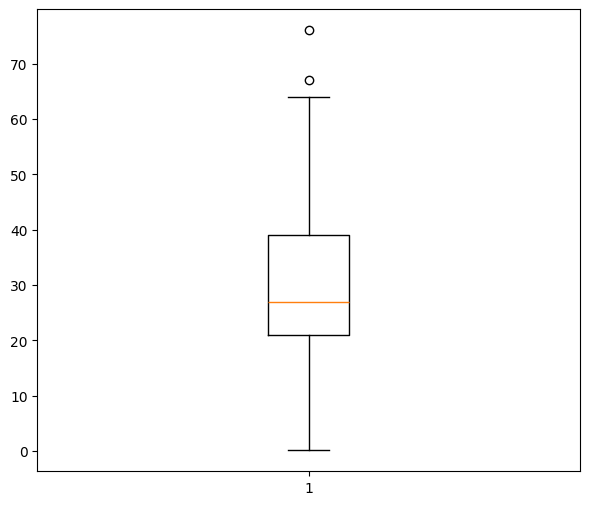

In [10]:
plt.figure(figsize=(7,6))
plt.boxplot(test["Age"].dropna())
plt.show()

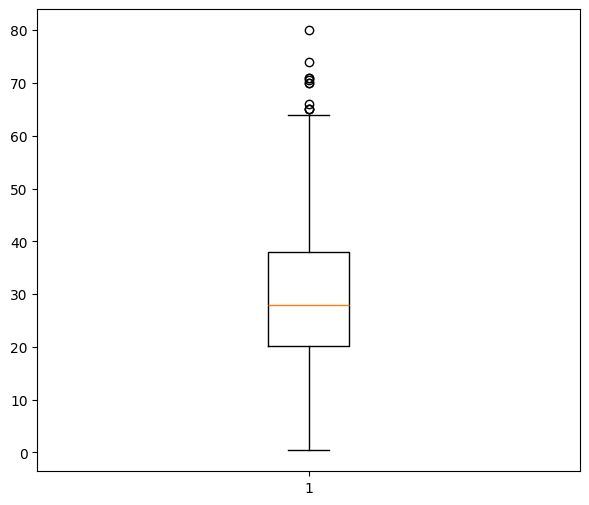

In [11]:
plt.figure(figsize=(7,6))
plt.boxplot(train["Age"].dropna())
plt.show()

In [12]:
mean_Age=int(train["Age"].mean())
mean_Age

29

In [13]:
mean_Agetest=int(test["Age"].mean())
mean_Agetest

30

In [14]:
#filling missing age values with mean
train['Age'].fillna(mean_Age, inplace=True)  # Impute missing 

C:\Users\ogalo\AppData\Local\Temp\ipykernel_11576\1425343531.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(mean_Age, inplace=True)  # Impute missing


In [15]:
test['Age'].fillna(value=29, inplace=True)

C:\Users\ogalo\AppData\Local\Temp\ipykernel_11576\2390689455.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(value=29, inplace=True)


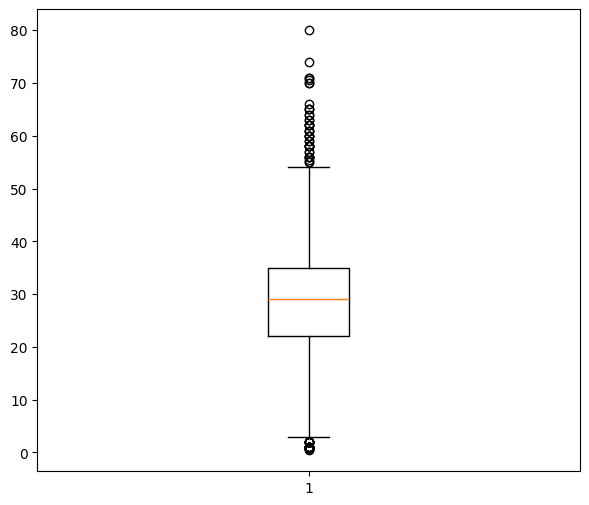

In [16]:
plt.figure(figsize=(7,6))
plt.boxplot(train["Age"])
plt.show()

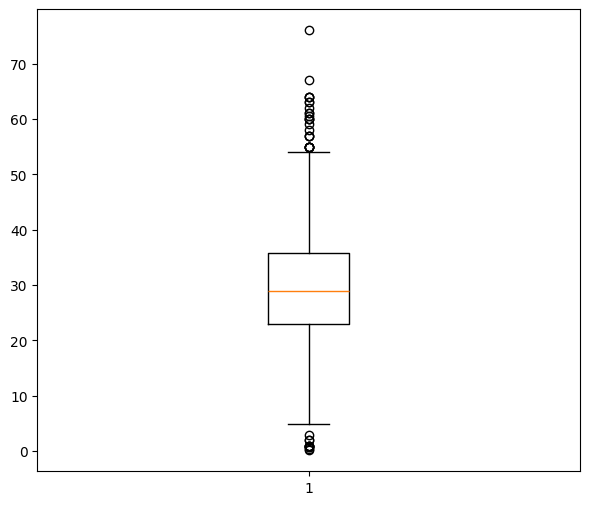

In [17]:
plt.figure(figsize=(7,6))
plt.boxplot(test["Age"].dropna())
plt.show()

In [18]:
len(test['Fare'])

418

In [19]:
test['Fare'].isnull().sum()

np.int64(1)

In [20]:
test['Cabin'].isnull().sum()

np.int64(327)

In [21]:
#Analysing Cabin column 
len(train['Cabin'])

891

In [22]:
train['Cabin'].isnull().sum()
#dropping cabin column not useful..many null values 

np.int64(687)

In [23]:
len(train["Embarked"])

891

In [24]:
train["Embarked"].isnull().sum()
#Embarked has only two null values we can impute with the most common valu in the column 

np.int64(2)

In [25]:
mode_value=train["Embarked"].mode()[0]
mode_value

'S'

In [26]:
train['Embarked'].fillna(mode_value,inplace=True) 


C:\Users\ogalo\AppData\Local\Temp\ipykernel_11576\2577304407.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(mode_value,inplace=True)


In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
train["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [29]:
train["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [30]:
train["Pclass"].unique()

array([3, 1, 2])

In [31]:
train["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [32]:
train["Sex"].unique()

array(['male', 'female'], dtype=object)

In [33]:
#dropping ticket and name columns as well and passangerId
columns_to_drop = ["Name","Ticket","PassengerId","Cabin"]
train.drop(columns=columns_to_drop,axis=1,inplace= True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [34]:
mean_fare=int(test["Fare"].mean())
mean_fare

35

In [35]:
#droppin a single row having null value in fare column 
#filling missing age values with mean
test['Fare'].fillna(mean_fare, inplace=True)  # Impute missing 

C:\Users\ogalo\AppData\Local\Temp\ipykernel_11576\1970657656.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(mean_fare, inplace=True)  # Impute missing


In [36]:
columns_to_drop_test = ["Name","Ticket","PassengerId","Cabin"]
test.drop(columns=columns_to_drop,axis=1,inplace= True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [37]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [38]:
test.isnull().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [39]:
#encoding cgender column in train dataset 
le= LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])



#encoding Embarked with 1 hot encorder in train dataset 
train=pd.get_dummies(train, columns=['Embarked'], drop_first=False)
train


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,False,False,True
887,1,1,0,19.0,0,0,30.0000,False,False,True
888,0,3,0,29.0,1,2,23.4500,False,False,True
889,1,1,1,26.0,0,0,30.0000,True,False,False


In [40]:
#encoding cgender column in test dataset 
le_2= LabelEncoder()
test['Sex'] = le_2.fit_transform(test['Sex'])



#encoding Embarked with 1 hot encorder in test dataset 
test=pd.get_dummies(test, columns=['Embarked'], drop_first=False)
test


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,False,True,False
1,3,0,47.0,1,0,7.0000,False,False,True
2,2,1,62.0,0,0,9.6875,False,True,False
3,3,1,27.0,0,0,8.6625,False,False,True
4,3,0,22.0,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...,...
413,3,1,29.0,0,0,8.0500,False,False,True
414,1,0,39.0,0,0,108.9000,True,False,False
415,3,1,38.5,0,0,7.2500,False,False,True
416,3,1,29.0,0,0,8.0500,False,False,True


In [41]:
x_train=train.drop(["Survived"],axis=1)
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,False,False,True
1,1,0,38.0,1,0,71.2833,True,False,False
2,3,0,26.0,0,0,7.9250,False,False,True
3,1,0,35.0,1,0,53.1000,False,False,True
4,3,1,35.0,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,False,False,True
887,1,0,19.0,0,0,30.0000,False,False,True
888,3,0,29.0,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


In [42]:
y_train=train["Survived"]
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [43]:
target_ratio= y_train.value_counts()/len(y_train)
target_ratio

Survived
0    0.616162
1    0.383838
Name: count, dtype: float64

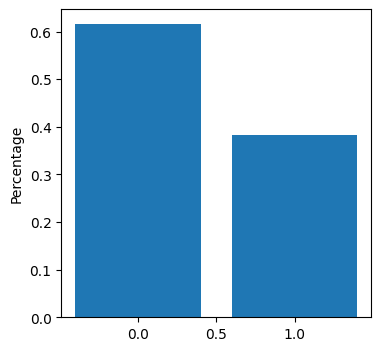

In [44]:
#visualizing class imbalance
plt.figure(figsize = (4,4))
plt.bar(target_ratio.index,target_ratio)
plt.ylabel('Percentage')
plt.show()

<Axes: title={'center': 'Features correlation matrix'}>

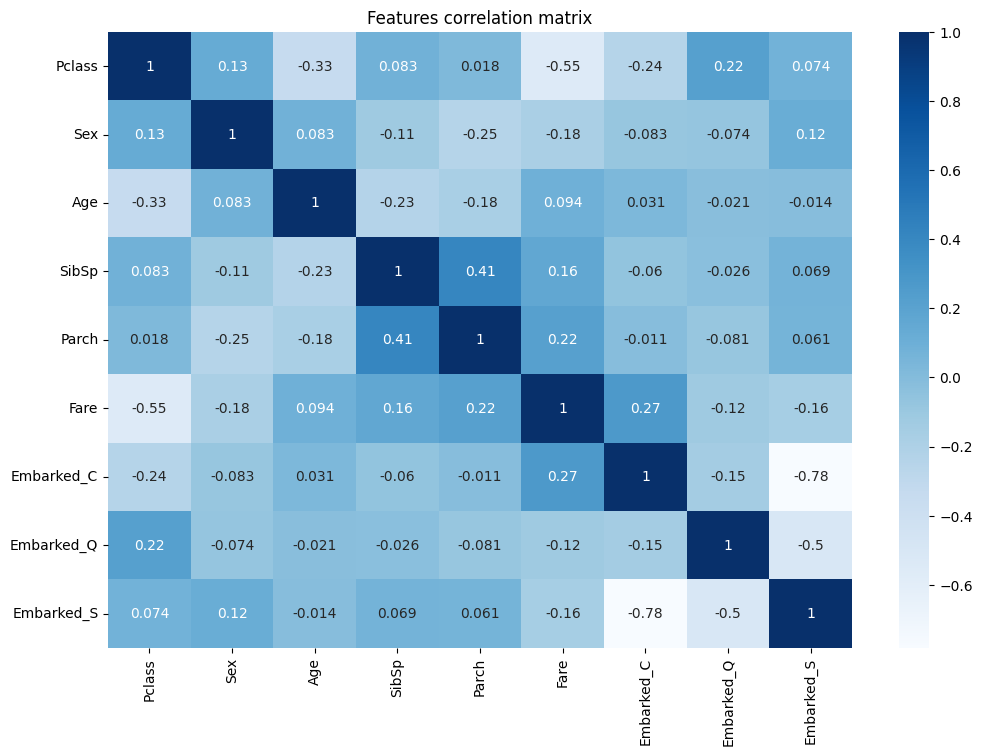

In [45]:
#checking correlation of x variables in train data
corr=x_train.corr()
plt.figure(figsize=(12,8))
plt.title('Features correlation matrix')
sns.heatmap(corr,annot=True,cmap='Blues',)

<Axes: title={'center': 'Features correlation matrix'}>

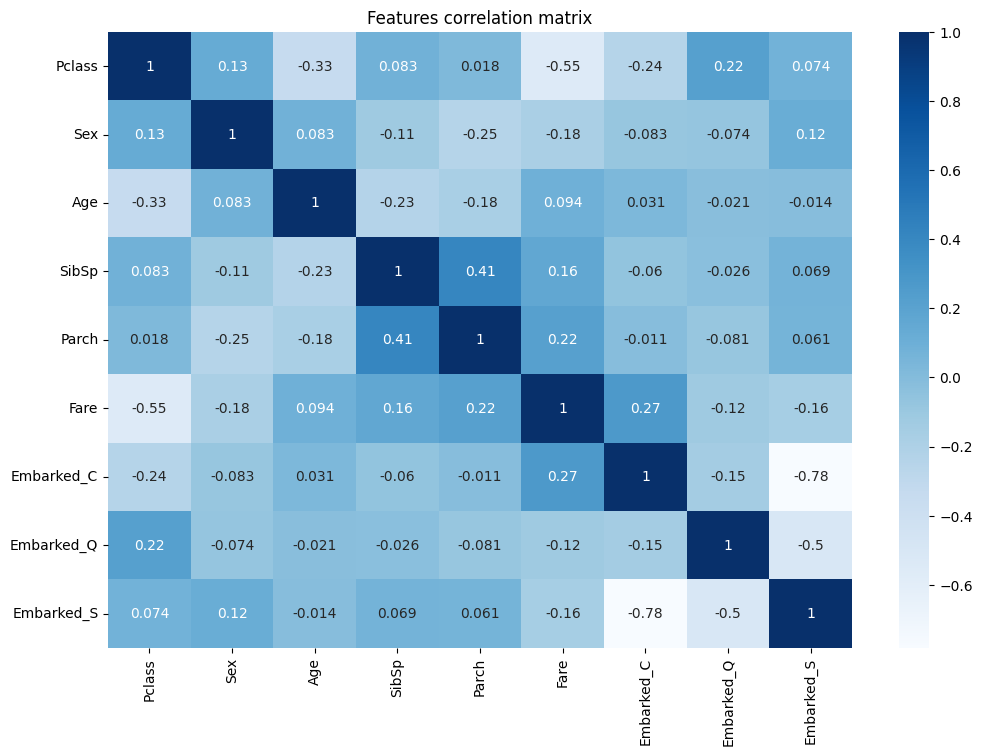

In [46]:
#checking correlation of x variables in test data
corr_2=test.corr()
plt.figure(figsize=(12,8))
plt.title('Features correlation matrix')
sns.heatmap(corr,annot=True,cmap='Blues',)

In [47]:
#scaling x variables on train data
scl=RobustScaler()
x_train= scl.fit_transform(x_train)


In [48]:
#scaling x variables on test data
scl_2=RobustScaler()
test= scl.fit_transform(test)


In [49]:
#LogisticRegression model training 
log_reg=LogisticRegression(
     C=0.5, 
    class_weight= 'balanced', 
    max_iter= 300, 
    penalty= 'l2', 
    solver= 'saga', 
    tol= 0.0001,
    random_state=42
)
log_reg.fit(x_train,y_train)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=300,
                   random_state=42, solver='saga')

In [50]:
log_reg.score(x_train,y_train)

0.7912457912457912

In [51]:
#predicting on LogisticRegression model
logreg_pred=log_reg.predict(test)
logreg_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [52]:
xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=4, scale_pos_weight=1, random_state=42)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [53]:
xgb.score(x_train, y_train)

0.8978675645342312

In [54]:
pred3=xgb.predict(test)
submission3=pd.DataFrame(pred3, columns=["Survived"])
submission3


,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [55]:
submission_4=pd.DataFrame(logreg_pred, columns=["Survived"]) 
submission_4.set_index(test_copy['PassengerId'], inplace=True)
submission_4 

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [56]:
submission_4.to_csv('submission_4.csv', index=True)

In [57]:
#from IPython.display import FileLink
#FileLink('submission.csv')

In [58]:
submission3.set_index(test_copy['PassengerId'], inplace=True)
submission3 

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [59]:
submission3.to_csv('submissiontitanic.csv', index=True)

In [60]:
test_copy

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
